# Density Based Spatial Clustering of Applications with Noise (DBSCAN) 

<center>Resources</center>

P. Fränti and S. Sieranoja
K-means properties on six clustering benchmark datasets
Applied Intelligence, 48 (12), 4743-4759, December 2018
https://doi.org/10.1007/s10489-018-1238-7

https://iopscience.iop.org/article/10.1088/1755-1315/31/1/012012/pdf

In [121]:
import numpy as np

def basicDBScan(Data, eps, RNG, MinPts, DistFunc = radial_dist, BreakPt = None):
    """
    Parameters:
    ----------
    Data: array-like
        array of points of the shape (num_samples, num_dimensions)
    eps: float
        distance around each point to be considered. Passed to distance function if not default.
    MinPts: int
        minimum number of points required for a point to be added to a cluster.
    DistFunc: function, default = radial_dist
        pass if want non-default distance calculating function
    BreakPt: int, default = None
        pass if want to set a maximum recursion depth within a cluster (typically to detect non-terminating loop)
    """
    
    def pick_Random(indices, Data, RNG, cluster_ids):
        index = RNG.choice(indices[cluster_ids == False])
        point = Data[index]
        
        return (index,point)
    
    cluster_ids = np.zeros(len(Data))
    indices = np.arange(len(Data))
    
    cluster_count = 0
    while np.any(cluster_ids == 0):
        
        # Pick a random point and calculate distances
        init_index, init_point = pick_Random(indices, Data, RNG, cluster_ids)
        init_distances = DistFunc(init_point, Data)
        
        # Add its nearest neigbors to a set
        pts_indices = indices[init_distances <= eps]
        pts_set = Data[init_distances <= eps]
        
        if len(pts_set) >= MinPts:
            cluster_count += 1
            
            n_iters = 0
            while len(pts_set) >= MinPts:                
                # print(n_iters)
                previous_set = np.array(pts_set, copy = True)
                
                # Add pts to cluster
                cluster_ids[pts_indices] = cluster_count

                # Test all of the clustered points. If they pass, add the points around them to the new set of points. Otherwise, ignore.
                inner_pts_bools = []
                for i,pt in enumerate(pts_set):
                    # print('i',i)
                    inner_pt_bool = (DistFunc(pt, Data) <= eps)
                    if np.count_nonzero(inner_pt_bool) >= MinPts:
                        inner_pts_bools.append(inner_pt_bool)
                
                # If there are no points that qualify to add their neighbors to the cluster, return an empty set so a new init point is chosen
                if len(inner_pts_bools) == 0:
                    pts_sets = []
                    pts_indices = []
                    # Else find all the points included, subtract the points already in the cluster and return the new set of points
                else:
                    neighbor_bools = np.bitwise_or.reduce(np.stack(inner_pts_bools, axis = 0), axis = 0)
                    neigbor_no_cluster_bools  = np.logical_and(neighbor_bools, (cluster_ids != cluster_count))                 
                    pts_set = Data[neigbor_no_cluster_bools]
                    pts_indices = indices[neigbor_no_cluster_bools]
                # print('iter complete')
                n_iters += 1
        else:
            cluster_ids[init_index] = -1
    
    return cluster_ids

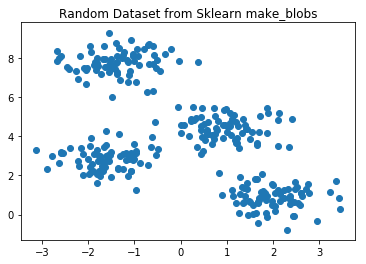

In [108]:
import matplotlib.pyplot as plt

from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

plt.scatter(X[:, 0], X[:, 1])
plt.title('Random Dataset from Sklearn make_blobs')
plt.show()

Text(0.5, 1.0, 'Plot of 3rd closest to each point')

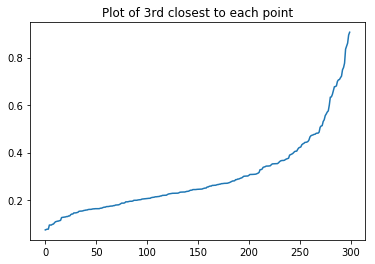

In [103]:
import numpy as np

def radial_dist(Datapt, Data):
    return np.sum((Data - Datapt)**2, axis = 1)**.5

def k_dist(X, k = 4):
    distances = np.stack([np.partition(radial_dist(pt, X), k)[:k] for pt in X])
    distances = np.sort(distances, axis = 1)
    distances = np.sort(distances, axis = 0)
    return distances[:, k-1]

plt.plot(k_dist(X))
plt.title('Plot of 3rd closest to each point')

# The bend of the elbow is where the Eps roughly is .3

In [129]:
RNG = np.random.default_rng()

arr = basicDBScan(X, eps = .3, RNG = RNG, MinPts = 4,)

print('num clusters from DBSCAN (really 4)', np.max(arr))

num clusters from DBSCAN (really 4) 14.0


In [130]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = .3, min_samples = 4)
dbscan_clusters = dbscan.fit_predict(X)

print('num clusters from DBSCAN (really 4)', np.max(dbscan_clusters))

num clusters from DBSCAN (really 4) 9


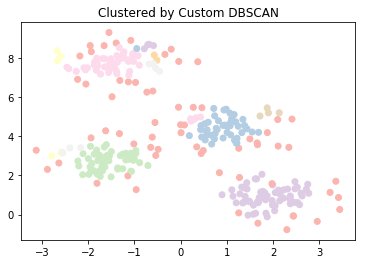

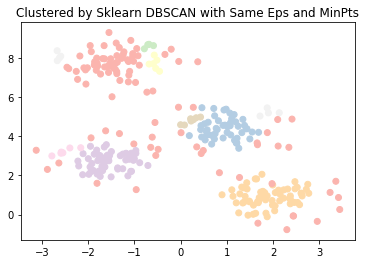

<function matplotlib.pyplot.show(*args, **kw)>

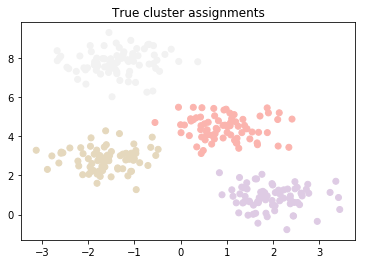

In [124]:
plt.scatter(X[:, 0], X[:, 1], c = arr, cmap = 'Pastel1')
plt.title('Clustered by Custom DBSCAN')
plt.show()
plt.scatter(X[:, 0], X[:, 1], c = dbscan_clusters, cmap = 'Pastel1')
plt.title('Clustered by Sklearn DBSCAN with Same Eps and MinPts')
plt.show()
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = 'Pastel1')
plt.title('True cluster assignments')
plt.show

shape:  (7500, 2)
Min and max x-values:  0.0 65535.0
Min and max y-values:  976.0 64142.0


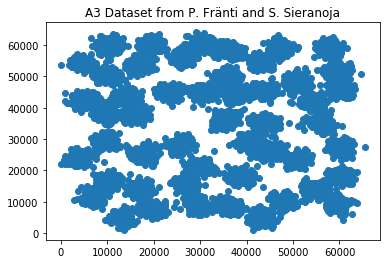

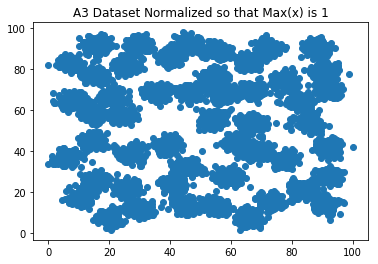

In [57]:
# P. Fränti and S. Sieranoja A3 Dataset of 50 clusters
import matplotlib.pyplot as plt

a3 = np.loadtxt(r'./datasets/Clustering - a3 (k =50).txt')

print('shape: ',a3.shape)
print('Min and max x-values: ', np.min(a3[:, 0]), np.max(a3[:, 0]))
print('Min and max y-values: ', np.min(a3[:, 1]), np.max(a3[:, 1]))

plt.scatter(a3[:, 0], a3[:, 1])
plt.title('A3 Dataset from P. Fränti and S. Sieranoja')
plt.show()

a3_norm = np.array(a3, copy = True)
a3_norm[:, 0] /= np.max(a3[:, 0]*(1/100))
a3_norm[:, 1] /= np.max(a3[:, 0]*(1/100))

plt.scatter(a3_norm[:, 0], a3_norm[:, 1])
plt.title("A3 Dataset Normalized so that Max(x) is 1")
plt.show()

Text(0.5, 1.0, 'A3 K-dist plot')

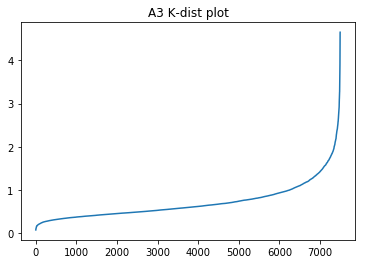

In [10]:
plt.plot(k_dist(a3_norm))
plt.title('A3 K-dist plot')

In [72]:
out = basicDBScan(a3_norm, eps = 1, RNG = RNG, MinPts = 4)

C:\Users\HP\Anaconda3\envs\tf2\lib\site-packages\ipykernel_launcher.py:66: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


n_iters  1 ; len(pts_set)  13 ; current set vs previous  0 cluster_count 1
n_iters  2 ; len(pts_set)  18 ; current set vs previous  0 cluster_count 1
n_iters  3 ; len(pts_set)  20 ; current set vs previous  0 cluster_count 1
n_iters  4 ; len(pts_set)  25 ; current set vs previous  0 cluster_count 1
n_iters  5 ; len(pts_set)  22 ; current set vs previous  0 cluster_count 1
n_iters  6 ; len(pts_set)  10 ; current set vs previous  0 cluster_count 1
n_iters  7 ; len(pts_set)  13 ; current set vs previous  0 cluster_count 1
n_iters  8 ; len(pts_set)  4 ; current set vs previous  0 cluster_count 1
n_iters  9 ; len(pts_set)  0 ; current set vs previous  0 cluster_count 1
n_iters  1 ; len(pts_set)  0 ; current set vs previous  0 cluster_count 2
n_iters  1 ; len(pts_set)  3 ; current set vs previous  0 cluster_count 3
n_iters  1 ; len(pts_set)  16 ; current set vs previous  0 cluster_count 4
n_iters  2 ; len(pts_set)  20 ; current set vs previous  0 cluster_count 4
n_iters  3 ; len(pts_set)  17

In [136]:
dbscan = DBSCAN(eps = 1, min_samples = 4)
dbscan_clusters_a3 = dbscan.fit_predict(a3_norm)

print('num clusters from DBSCAN (really 50)', np.max(dbscan_clusters))

num clusters from DBSCAN (really 50) 82


In [86]:
# From: https://gist.github.com/jakevdp/91077b0cae40f8f8244a

# By Jake VanderPlas
# License: BSD-style

from matplotlib.colors import LinearSegmentedColormap

def discrete_cmap(N, base_cmap=None):
    """Create an N-bin discrete colormap from the specified input map"""

    # Note that if base_cmap is a string or None, you can simply do
    #    return plt.cm.get_cmap(base_cmap, N)
    # The following works for string, None, or a colormap instance:

    base = plt.cm.get_cmap(base_cmap)
    color_list = base(np.linspace(0, 1, N))
    cmap_name = base.name + str(N)
    return LinearSegmentedColormap.from_list(cmap_name, color_list, N)

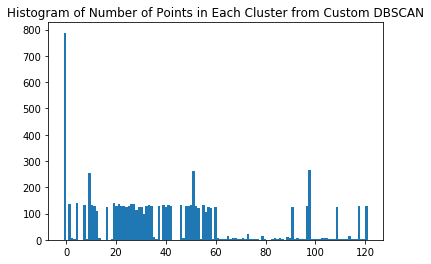

0


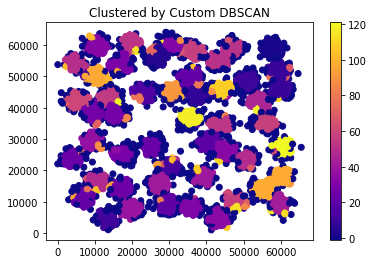

In [135]:
plt.hist(out, int(np.max(out)+2))
plt.title('Histogram of Number of Points in Each Cluster from Custom DBSCAN')
plt.show()

print(np.count_nonzero(out == 0))

fig,ax = plt.subplots(1)
cmap = discrete_cmap(N = int(np.max(out)+2), base_cmap = 'plasma')
sc = ax.scatter(a3[:, 0], a3[:, 1], c = out, cmap = cmap)
cbar = fig.colorbar(sc, ax = ax)
plt.title('Clustered by Custom DBSCAN')

plt.show()

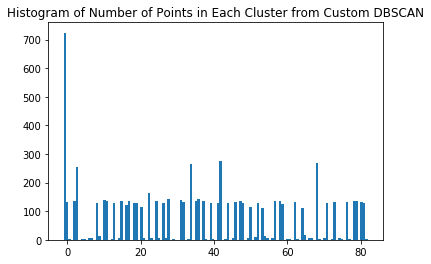

Text(0.5, 1.0, 'Clustered by Sklearn DBSCAN')

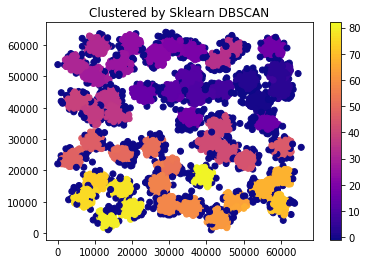

In [138]:
plt.hist(dbscan_clusters_a3, int(np.max(out)+2))
plt.title('Histogram of Number of Points in Each Cluster from Custom DBSCAN')
plt.show()

fig,ax = plt.subplots(1)
sc = ax.scatter(a3[:, 0], a3[:, 1], c = dbscan_clusters_a3, cmap = cmap)
cbar = fig.colorbar(sc, ax = ax)
plt.title('Clustered by Sklearn DBSCAN')

### 1. Type of Data
* N-dimensional data

### 2. Use Case
* When there is known noise in the data
* When you know little to nothing about the data (eg do not know number of clusters)

### 3. Application
* At the start of any clustering problem
* An example would be in discretizing continous data

### 4. Basic Concept (Ester et al., 1996)
* The idea of a cluster is that it has density in the cluster is "considerably" higher than the areas of noise (Ester et al., 1996)
* DBScan starts at an arbitrary point and, given that it has a certain number of points in a certain neighborhood around it adds it and all of the surrounding points to a cluster. Then it repeats the process with all the surroundign points, then with all the points surrounding those and so on until it terminates and reinitializes at a new point. This process can be summarized as following a chain of points until they terminate.
* Eps is typically visually estimated from a k-dist graph. The Eps is set at the level where there is a slight valley in the data prior to it changing slope

### 5. Assumptions
* Data had clusters
* There is a difference between noise and cluster
* That you can detect

### 6. Existing solutions

### 7. Strengths and Weaknesses
#### Strengths
* Needs little to no background to the data

#### Weaknesses
* Deciding Eps and MinPts can be unscientific
* Often results in worse results than k-means
* Like K-means, prefers isotropic data